# Summary <p>
hello

Imports Below

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline


Import diabetes dataset

In [18]:
diabetes_data= load_diabetes(as_frame=True)

Check structure

In [19]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [20]:
diabetes_data.data.shape

(442, 10)

In [21]:
diabetes_data.target.shape

(442,)

Convert data into pandas dataframe

In [22]:
diabetes_pd = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])

print("Shape of the dataset: ", diabetes_pd.shape)

print(diabetes_pd.describe().loc[['min', 'max', 'mean']])

Shape of the dataset:  (442, 10)
               age           sex           bmi            bp            s1  \
min  -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
max   1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   
mean -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   

                s2            s3            s4            s5            s6  
min  -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01  
max   1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01  
mean  3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  


Draw Scatter matrix

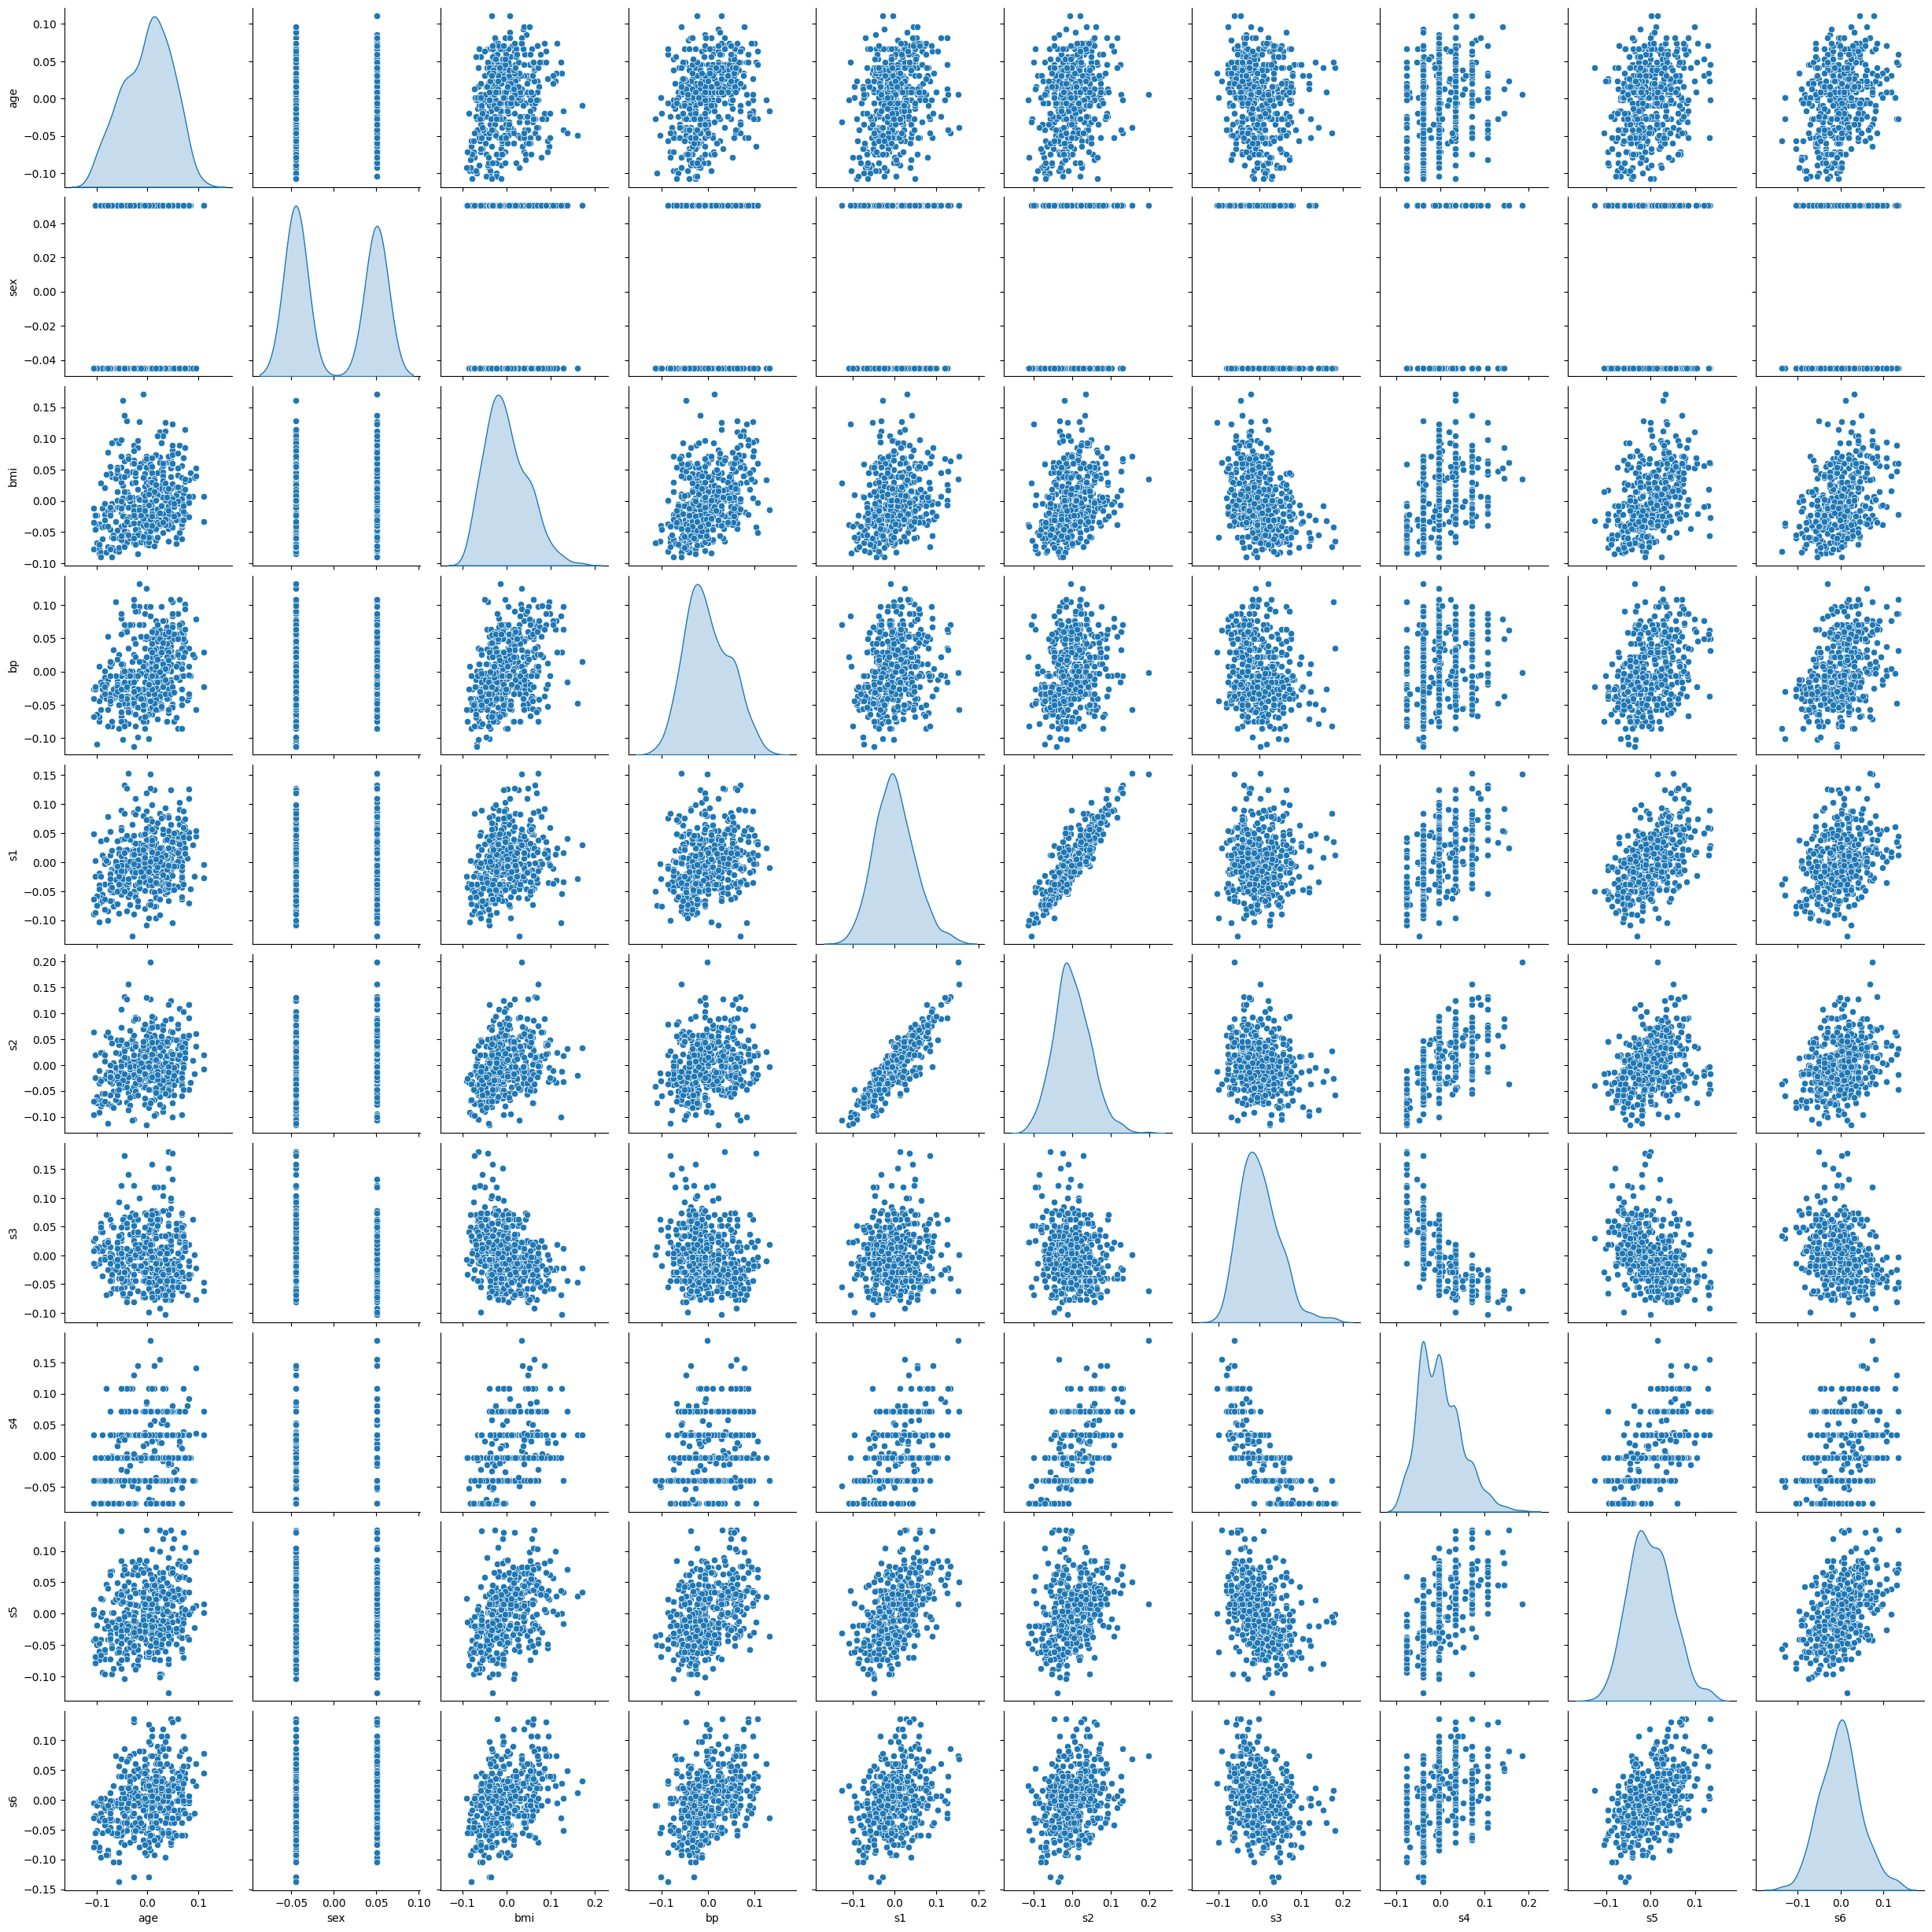

In [23]:
sb.pairplot(diabetes_pd, diag_kind='kde')
plt.show()

Identify Correlation

In [24]:
corr_matrix = diabetes_data.frame.corr()
corr_matrix.keys()

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [25]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

Pre-process the data

In [26]:
empty_values = diabetes_pd.isnull().sum()

print("Missing values: ", empty_values)
print("Due to no missing values no need to handle any missing values")

#feature scaling
feature_scaler = StandardScaler()

scaled_diabetes = feature_scaler.fit_transform(diabetes_pd)

diabetes_pd_scaled = pd.DataFrame(scaled_diabetes, columns=diabetes_pd.columns)
print('Diabetes post feature scaling: \n', diabetes_pd_scaled.head())
print('Diabetes date without feature scaling: \n', diabetes_pd.head())


Missing values:  age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Due to no missing values no need to handle any missing values
Diabetes post feature scaling: 
         age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  
Diabetes date without feature scaling: 
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0

Create test and train set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=.2, random_state=42)

Linear regression model

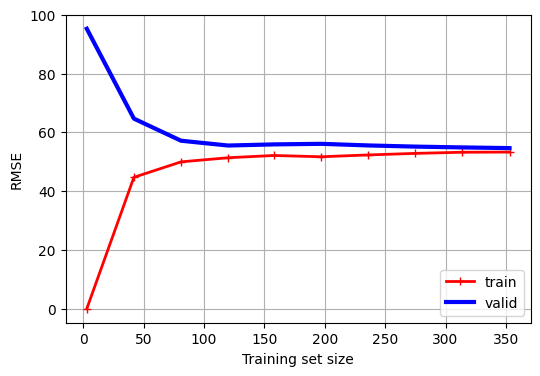

In [28]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

#predictions
y_train_pred_lr = linear_regression.predict(x_train)

y_test_pred_lr = linear_regression.predict(x_test)

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=linear_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="lower right")

plt.show()

Linear regression with lasso

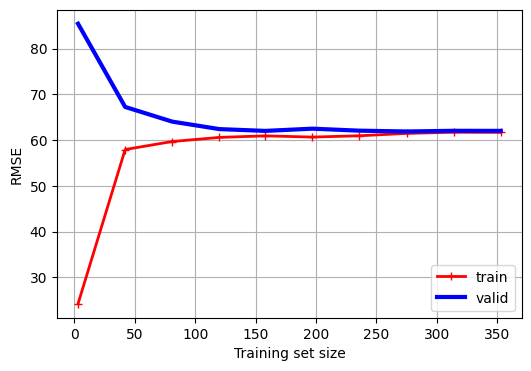

In [29]:
lasso_regression = Lasso(alpha=1.0)

lasso_regression.fit(x_train, y_train)

y_train_pred_lasso = lasso_regression.predict(x_train)
y_test_pred_lasso = lasso_regression.predict(x_test)

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=lasso_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_linear_lasso = -train_scores.mean(axis=1)
valid_errors_linear_lasso = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors_linear_lasso, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors_linear_lasso, 'b-', linewidth=3, label='valid')

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="lower right")

plt.show()

Linear regression with ridge

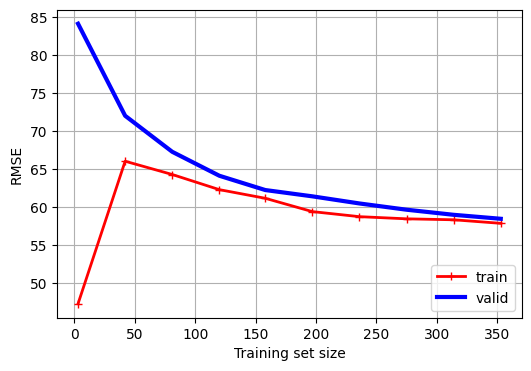

In [30]:
ridge_regression = Ridge(alpha=1.0)

ridge_regression.fit(x_train, y_train)

y_train_pred_ridge = ridge_regression.predict(x_train)
y_test_pred_ridge = ridge_regression.predict(x_test)

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=ridge_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_linear_ridge = -train_scores.mean(axis=1)
valid_errors_linear_ridge = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors_linear_ridge, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors_linear_ridge, 'b-', linewidth=3, label='valid')

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="lower right")

plt.show()

Linear with Elastic Net

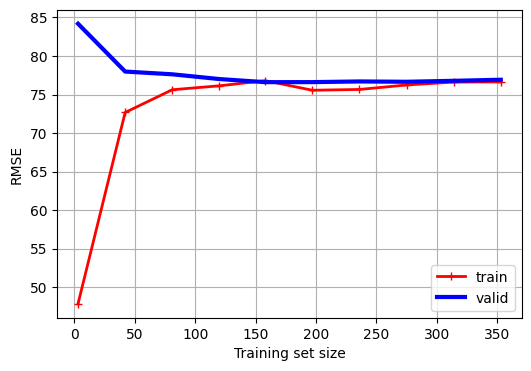

In [31]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=.5)

elastic_net.fit(x_train,y_train)

y_train_pred_elastic_net = elastic_net.predict(x_train)
y_test_pred_elastic_net = elastic_net.predict(x_test)

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=elastic_net, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_linear_en = -train_scores.mean(axis=1)
valid_errors_linear_en = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors_linear_en, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors_linear_en, 'b-', linewidth=3, label='valid')

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="lower right")

plt.show()

Polynomial Regression

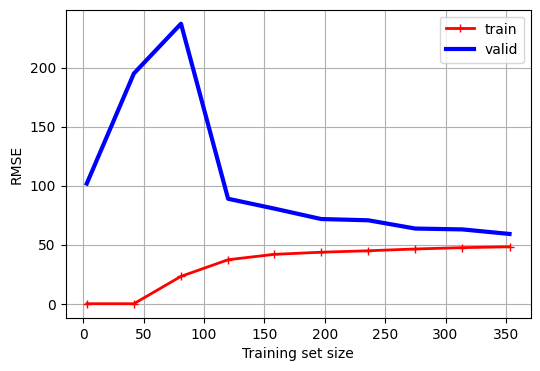

In [32]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_poly = -train_scores.mean(axis=1)
valid_errors_poly = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors_poly, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors_poly, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()


Polynomial regression with lasso

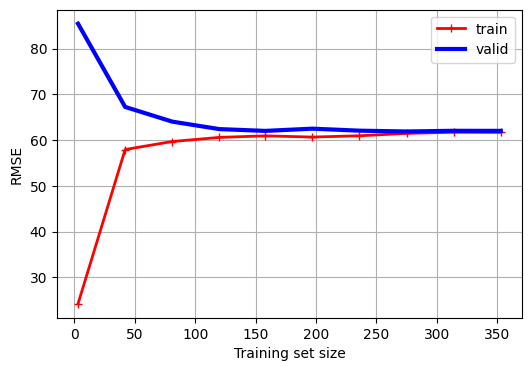

In [33]:
lasso_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=1.0)
)

train_sizes, train_scores, valid_scores = learning_curve(
    lasso_polynomial_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_poly_lasso = -train_scores.mean(axis=1)
valid_errors_poly_lasso = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors_poly_lasso, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors_poly_lasso, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()


Polynomial regression with ridge

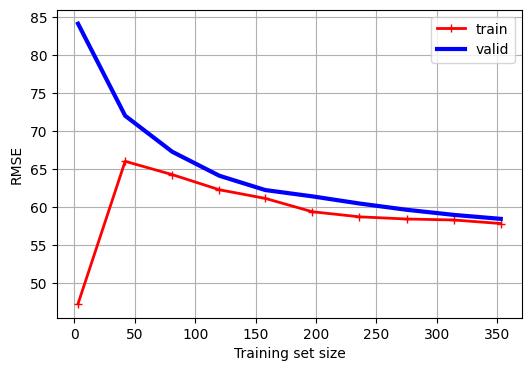

In [34]:
ridge_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

train_sizes, train_scores, valid_scores = learning_curve(
    ridge_polynomial_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_poly_ridge = -train_scores.mean(axis=1)
valid_errors_poly_ridge = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors_poly_ridge, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors_poly_ridge, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()

Polynomial regression with elastic net

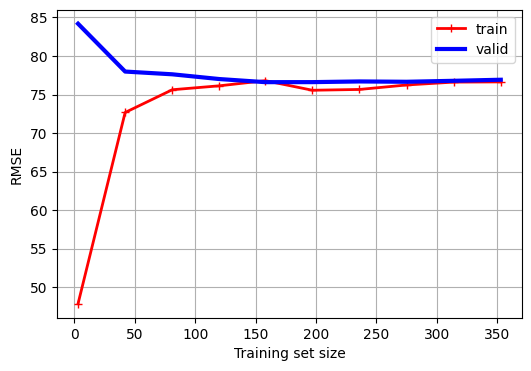

In [35]:
en_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=1.0, l1_ratio=0.5)
)

train_sizes, train_scores, valid_scores = learning_curve(
    en_polynomial_regression, X=diabetes_data.data, y=diabetes_data.target, cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
    scoring="neg_root_mean_squared_error", shuffle=True, random_state=42)

train_errors_poly_en = -train_scores.mean(axis=1)
valid_errors_poly_en = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors_poly_en, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors_poly_en, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()